# HMM Simulation for Continuous HMM
> Simulating a continuous HMM

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

In this notebook we shall create a continuous Hidden Markov Model [1] for an electrical appliance.
Problem description:

* Our appliance is a compressor based appliance and has 2 states (compressor ON and compressor OFF).
* When the compressor is ON, the power drawn by refrigerator is a normal distribution with mean 170 Watts and variance 4
* In off state, power drawn is 0 Watts with variance 1 W
* Prior probability of starting in OFF states is 90%
* If compressor is OFF, it remains OFF in the next cycle with probability 0.99
* If compressor is ON, it remains ON in the nxext cycle with probability 0.9

In all it matches the description of a continuous Hidden Markov Model. The different components of the Discrete HMM are as follows:

* **Observed States**  : Power draw
* **Hidden States**    : Compressor ON or OFF
* **Prior (pi)**            : Probability of starting in OFF or ON state
* **Transition Matrix (A)**: Probability of going from ON-> OFF and vice versa
* **Emission Matrix (B)**  : Matrix encoding the mean and variance associated with a particular state.


Next, we import the basic set of libraries used for matrix manipulation and for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#Setting Font Size as 20
matplotlib.rcParams.update({'font.size': 20})

Next, we define the different components of HMM which were described above.

In [4]:
pi=np.array([.9,.1])
A=np.array([[.99,.01],[.1,.9]])
B=np.array([{'mean':0,'variance':1},{'mean':170,'variance':4}])

Now based on these probability  we need to produce a sequence of **observed** and **hidden** states. We use the notion of weighted sampling, which basically means that terms/states with higher probabilies assigned to them are more likely to be selected/sampled. For example,let us consider the starting state. For this we need to use the **pi** matrix, since that encodes the likiliness of starting in a particular state. We observe that for starting in **Fair** state the probability is .667 and twice that of starting in **Biased** state. Thus, it is much more likely that we start in Fair state. We use **Fitness Proportionate Selection** [3] to sample states based on weights (probability). For selection of starting state we would proceed as follows:

* We choose a random value between 0 and 1
* We iterate over the list of values (prior) and iteratively subtract the value at current position from the number which we chose at random and as soon as it becomes negative, we return the index. Let us demonstrate this with a function.

In [5]:
'''
Returns next state according to weigted probability array. Code based on Weighted random generation in Python [4]
'''
def next_state(weights):
    choice = random.random() * sum(weights)
    for i, w in enumerate(weights):
        choice -= w
        if choice < 0:
            return i

We test the above function by making a call to it 1000 times and then we try to see how many times do we get a 0 (Fair) wrt 1 (Biased), 
given the **pi** vector.

In [6]:
count=0
for i in range(1000):
    count+=next_state(pi)
print "Expected number of Fair states:",1000-count
print "Expected number of Biased states:",count

Expected number of Fair states: 890
Expected number of Biased states: 110


Thus, we can see that we get approximately twice the number of Fair states as Biased states which is as expected.

Next, we write the following functions:

* create_hidden_sequence (pi,A,length): which creates a hidden sequence (Markov Chain) of desired length based on **Pi** and **A**. The algorithm
followed is as follows: We choose the first state as described above. Next on the basis of current state, we see it's transition matrix and assign
the next state by weighted sampling (by invoking next_state with argument as A[current_state])
* create_observed_sequence (hidden_sequence,B): which create an observed sequence based on hidden states and associated **B**. Based on current hidden state, we use it's emission parameters to sample the observation.

    

In [7]:
def create_hidden_sequence(pi,A,length):
    out=[None]*length
    out[0]=next_state(pi)
    for i in range(1,length):
        out[i]=next_state(A[out[i-1]])
    return out

   
def create_observation_sequence_continuous(hidden_sequence,B):
    length=len(hidden_sequence)
    out=[None]*length
    for i in range(length):
        out[i]=np.random.normal(B[hidden_sequence[i]]['mean'],B[hidden_sequence[i]]['variance'],1)
    return out

Thus, using these functions and the HMM paramters we decided earlier, we create length 1000 sequence for hidden and observed states.

In [8]:
hidden=np.array(create_hidden_sequence(pi,A,1000))
observed=np.array(create_observation_sequence_continuous(hidden,B))

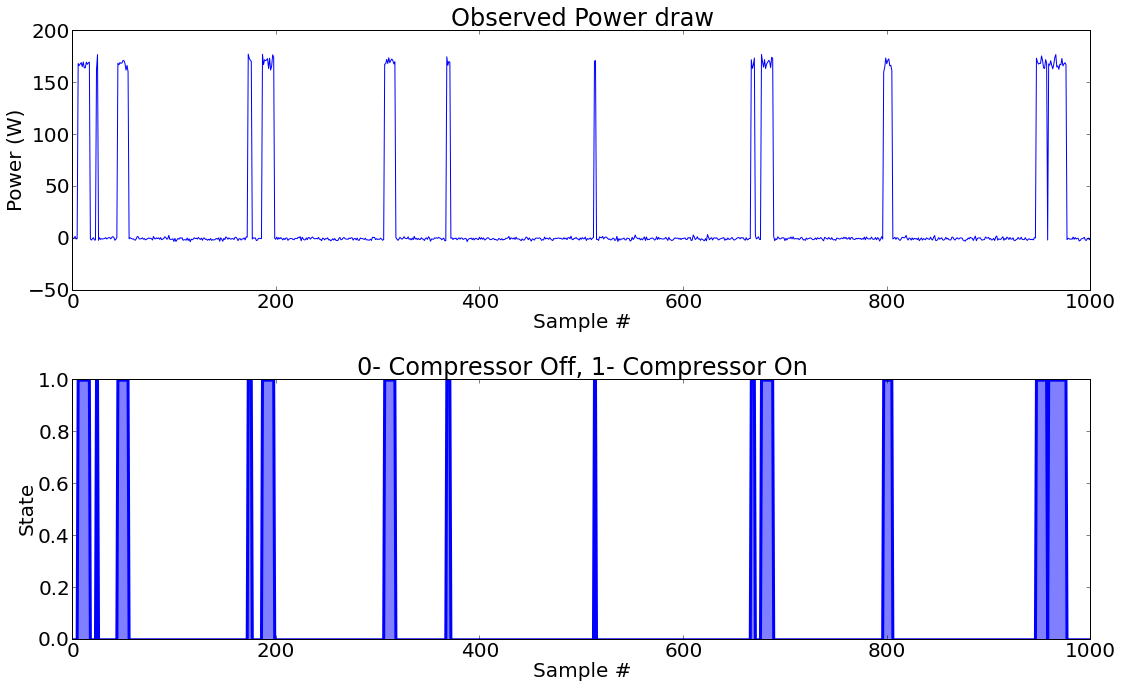

In [18]:
plt.figsize(16,10);
plt.subplot(2,1,1)
plt.title('Observed Power draw')
plt.ylabel('Power (W)');
plt.xlabel('Sample #');
plt.plot(observed)
plt.subplot(2,1,2);
plt.fill_between(range(len(hidden)),hidden,0,alpha=0.5)
plt.plot(hidden,linewidth=3);
plt.ylabel('State');
plt.xlabel('Sample #');
plt.title('0- Compressor Off, 1- Compressor On');
plt.tight_layout()


## References

1. http://en.wikipedia.org/wiki/Hidden_Markov_model
2. http://www.stanford.edu/class/stats366/hmmR2.html
3. http://en.wikipedia.org/wiki/Fitness_proportionate_selection
4. http://eli.thegreenplace.net/2010/01/22/weighted-random-generation-in-python/
5. http://stackoverflow.com/questions/2154249/identify-groups-of-continuous-numbers-in-a-list
